In [1]:
#first lets import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize']=(15,8)

In [3]:
#lets import train file and see what it contains
train = pd.read_csv('train.csv')
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [4]:
train.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id'],
      dtype='object')

In [5]:
#lets find out how many different building ids(rows) and features(columns) in training data
train.shape

(631761, 14)

In [7]:
#lets import building structure file and see what it contains
bs = pd.read_csv('Building_Structure.csv')
bs.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear


In [8]:
#now lets find out how much data it contains
bs.shape

(1052948, 29)

In [9]:
#So building structure has much more data than train file so lets see what test file contains
test = pd.read_csv('test.csv')
test.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [10]:
test.shape

(421175, 13)

In [11]:
#lets sum up the rows of train and test
test.shape[0]+train.shape[0]

1052936

In [13]:
#from above we get that building structure has little bit extra data than what contained in train and test combined. So these could be duplicate or extra datas
#so lets keep this part for preprocessing time
#lets import ownership data and see what it contains
bo = pd.read_csv('Building_Ownership_Use.csv')
bo.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [14]:
bo.shape

(1052948, 17)

In [15]:
#So ownership contains same number of rows as structure data
#lets merge these two files into one as building based on building ids
building = pd.merge(bs, bo, on='building_id')
building.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#print all these shapes
print(bo.shape)
print(bs.shape)
print(building.shape)

(1052948, 17)
(1052948, 29)
(1052948, 45)


In [17]:
#lets also merge train and building into train based on building id
train = pd.merge(train, building, on="building_id")
#lets also merge train and building into train based on building id
train = pd.merge(train, building, on="building_id")

In [18]:
#we can see now they will have more number of columns as building has merged with them
print(train.shape)
print(test.shape)

(631761, 102)
(421175, 13)


In [19]:
#lets see all these features
train.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       ...
       'has_secondary_use_agriculture_y', 'has_secondary_use_hotel_y',
       'has_secondary_use_rental_y', 'has_secondary_use_institution_y',
       'has_secondary_use_school_y', 'has_secondary_use_industry_y',
       'has_secondary_use_health_post_y', 'has_secondary_use_gov_office_y',
       'has_secondary_use_use_police_y', 'has_secondary_use_other_y'],
      dtype='object', length=102)

In [20]:
#lets have a look at the count,min,max,mean ets using describe()
train.describe()

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,has_secondary_use_agriculture_y,has_secondary_use_hotel_y,has_secondary_use_rental_y,has_secondary_use_institution_y,has_secondary_use_school_y,has_secondary_use_industry_y,has_secondary_use_health_post_y,has_secondary_use_gov_office_y,has_secondary_use_use_police_y,has_secondary_use_other_y
count,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,...,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000
mean,26.831720,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,...,0.063974,0.034182,0.008391,0.000972,0.000397,0.001103,0.000203,0.000150,0.000089,0.005041
std,7.771394,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,...,0.244706,0.181697,0.091216,0.031160,0.019928,0.033197,0.014233,0.012262,0.009415,0.070824
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Columns: 102 entries, area_assesed to has_secondary_use_other_y
dtypes: float64(6), int64(75), object(21)
memory usage: 496.5+ MB


In [22]:
#are there any duplicate
train.duplicated().sum()

0

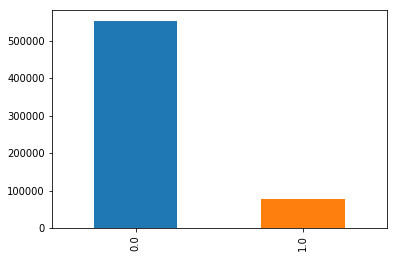

In [23]:
#Now lets see how the column value of geotechnical_risk is distributed
train['has_geotechnical_risk'].value_counts().plot(kind='bar')

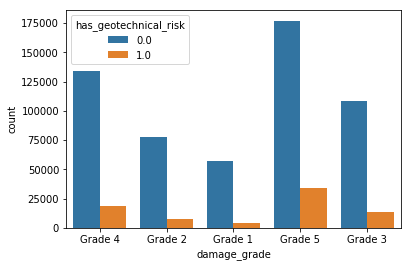

In [24]:
#The above graph claerly shows that 0 are more than 1 but does it affect the damage grae lets see
sns.countplot(x='damage_grade', hue='has_geotechnical_risk', data=train)

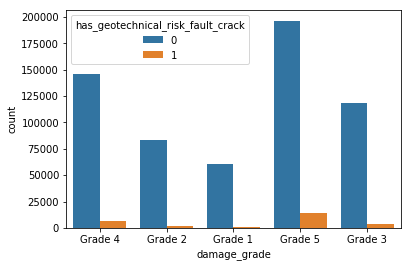

In [25]:
#So we see more number of 1 means it is more prone to damage so this is feature is important
#lets analyse the other one
sns.countplot(x='damage_grade', hue='has_geotechnical_risk_fault_crack', data=train)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


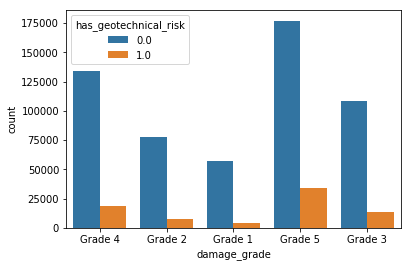

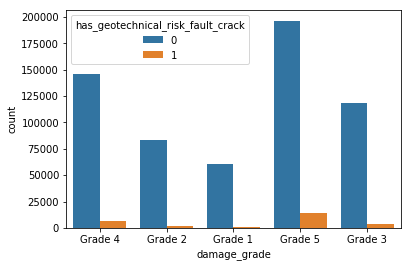

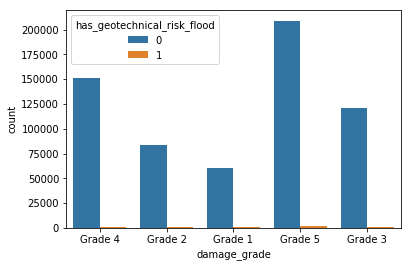

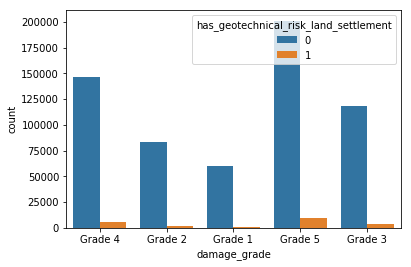

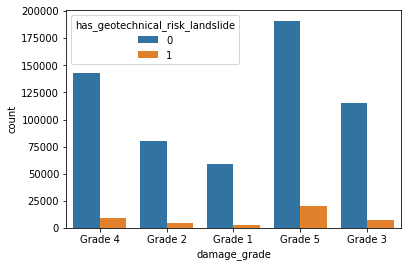

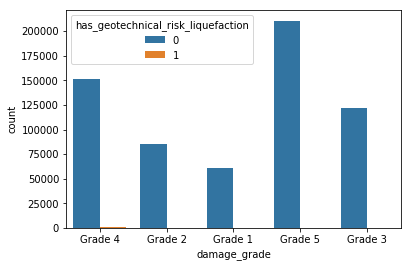

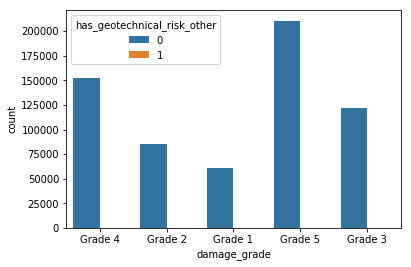

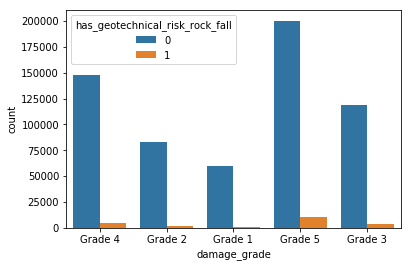

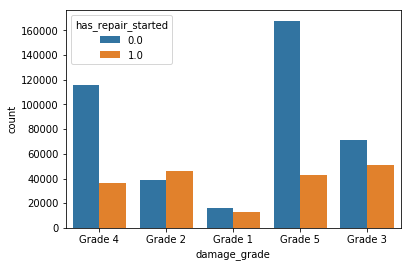

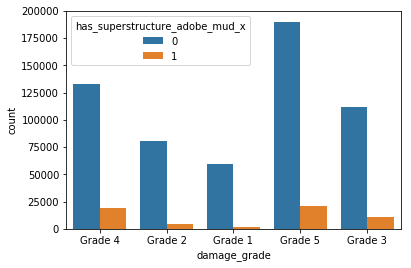

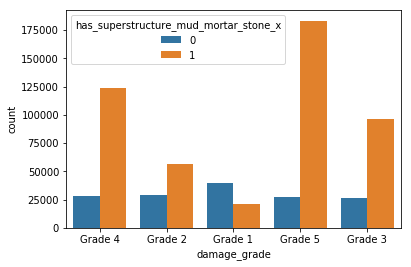

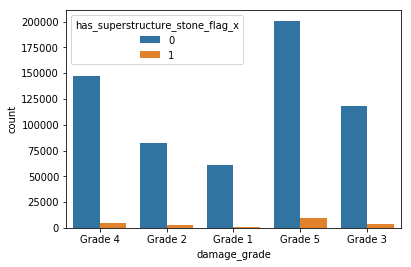

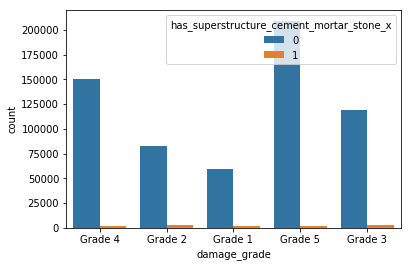

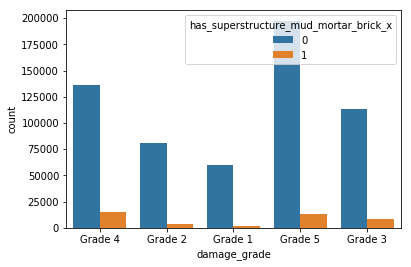

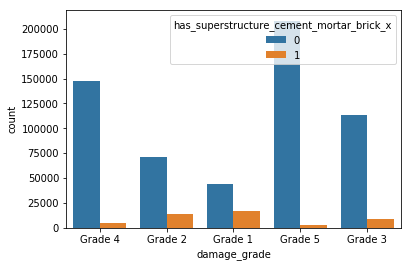

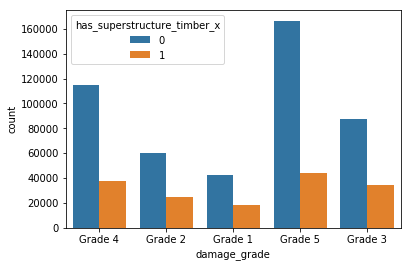

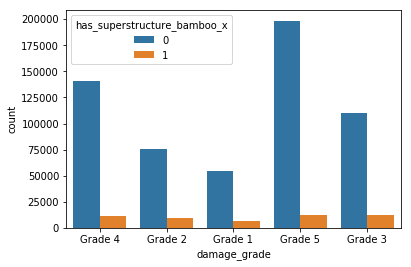

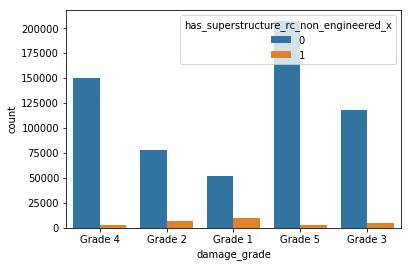

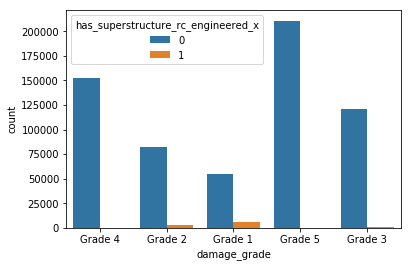

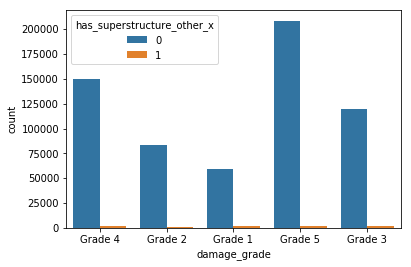

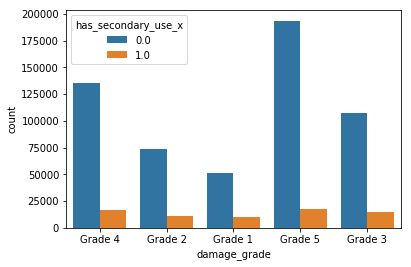

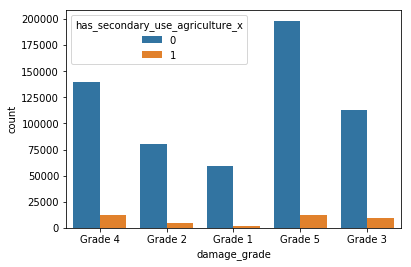

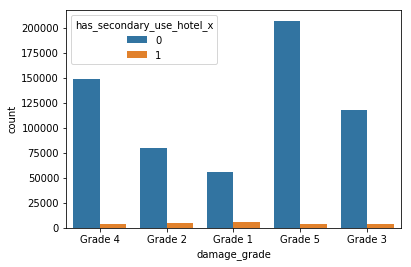

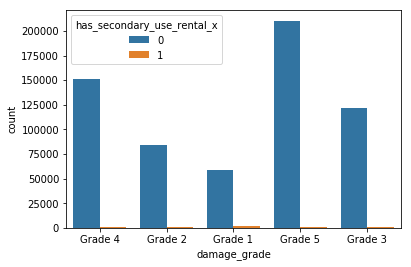

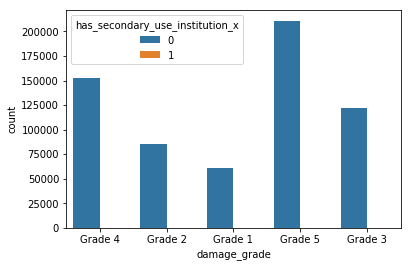

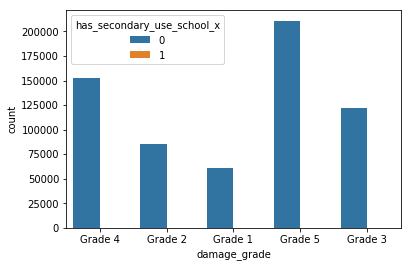

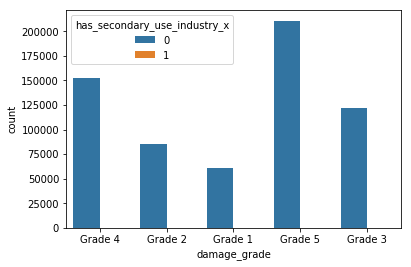

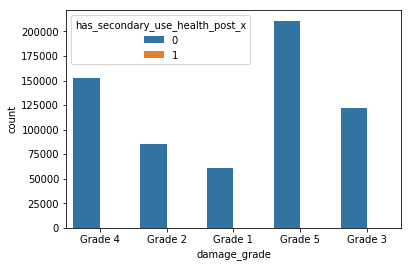

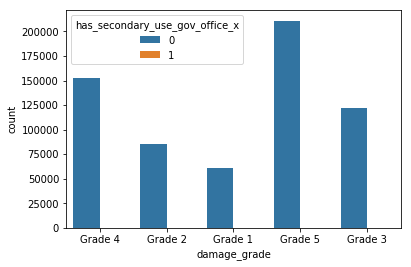

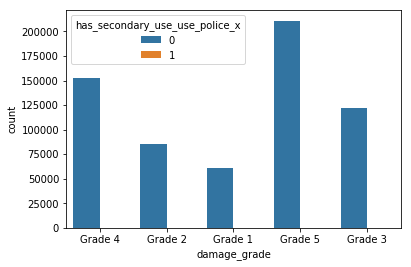

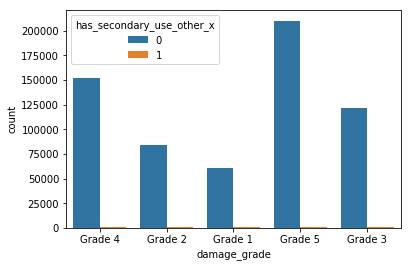

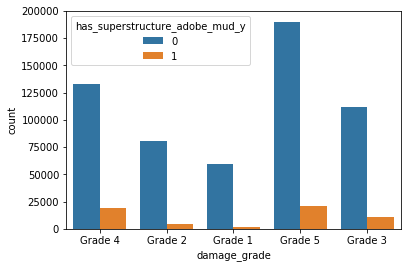

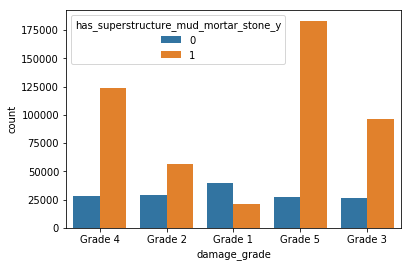

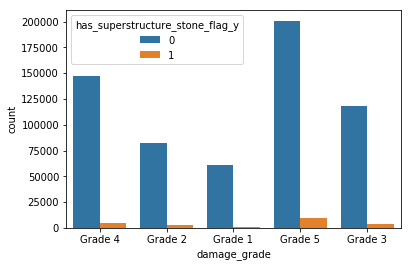

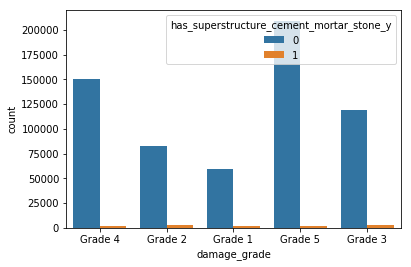

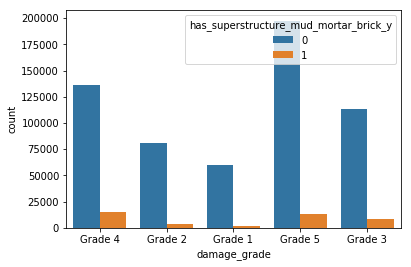

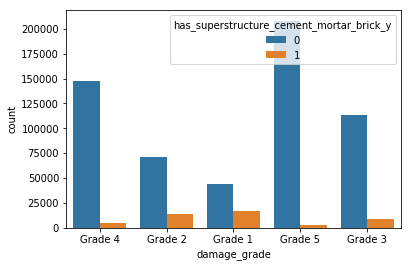

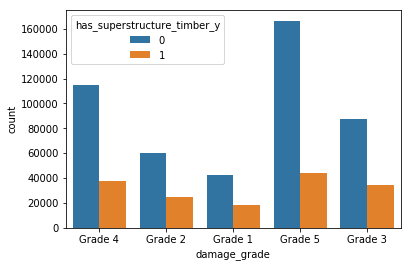

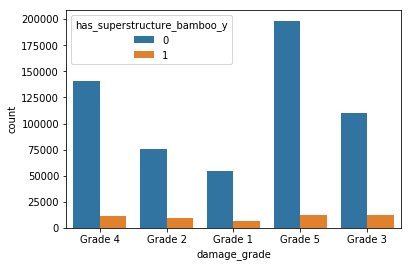

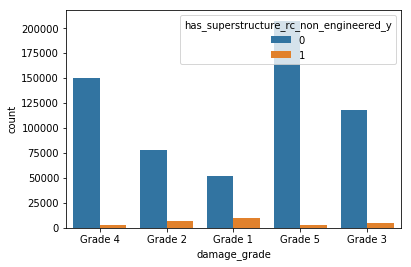

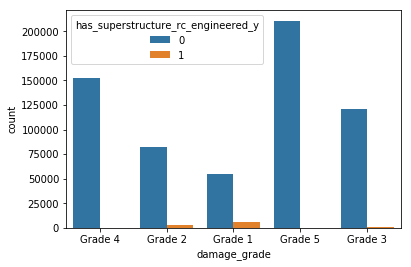

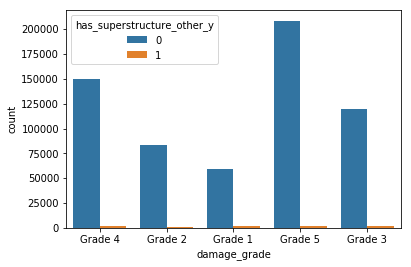

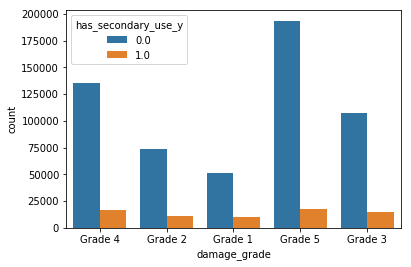

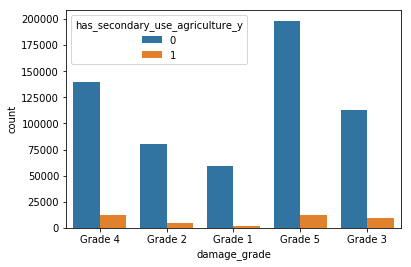

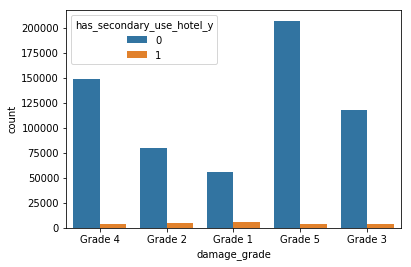

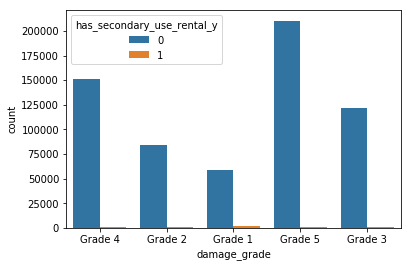

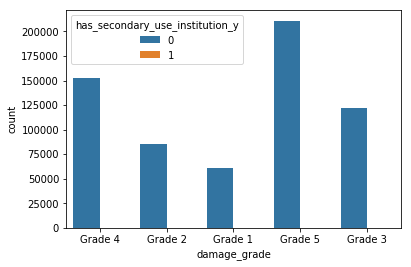

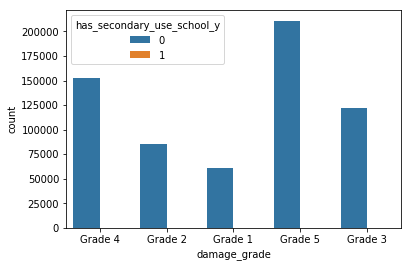

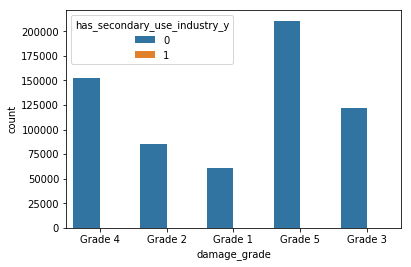

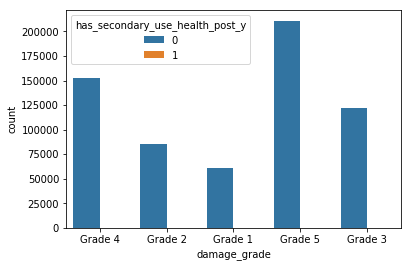

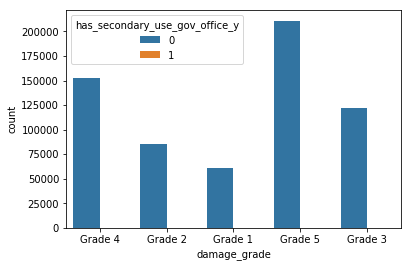

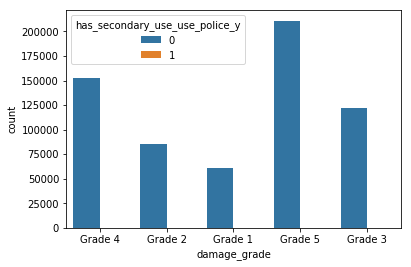

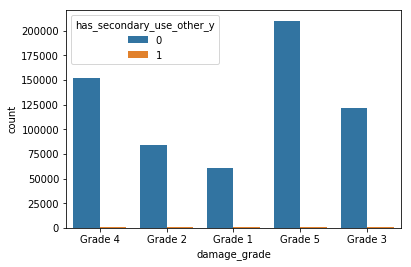

<Figure size 432x288 with 0 Axes>

In [26]:
#since there are many features lets run a loop and generate graphs for all
for col in train.columns.tolist():
    if 'has' in col:
        sns.countplot(x='damage_grade', hue=col, data=train)
        fig = plt.figure()

In [ ]:
#Now these graphs can be used later for deciding which features can be dropped and which should not